In [72]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [73]:
train = pd.read_csv('Train.csv')

In [74]:
test  = pd.read_csv('test.csv')
test['Item_Outlet_Sales'] = 0

In [75]:
train.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [76]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### as shown above there are items have visibilty = 0 which don't make sence as these items sold 


In [77]:
# find the number of unique values in each column
train.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

### as we shown above , we only have 2 columns with na values (Item_Weight,Outlet_Size)

In [78]:
#find the item weight for each unique item in the dataset
item_avg_weight = train.pivot_table(values='Item_Weight', index='Item_Identifier')

In [79]:
item_avg_weight.head()

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115


In [80]:
#Get a boolean variable specifying missing Item_Weight values
miss_bool = train['Item_Weight'].isnull()

### make groupby Item_Identifier on item_weight to find only on value for each Item_Identifier

In [81]:
train['Item_Weight'].fillna(train.groupby('Item_Identifier')['Item_Weight'].transform("mean") , inplace = True)

In [82]:
# beacaue there is exist 4 items with na . fill them with median of the column
train['Item_Weight'].fillna(train['Item_Weight'].median() , inplace =True)

### replace visibilty = 0.0 with nan, and fill na with the mean of the values of each item 

In [83]:
train['Item_Visibility'] = train['Item_Visibility'].replace(0 , np.nan)

In [84]:
train['Item_Visibility'].fillna(train.groupby('Item_Identifier')['Item_Visibility'].transform("mean") , inplace = True)

### replace the missing values of outlet_size based on outlet identifier  ['OUT010','OUT045'] == "small"

In [85]:
train.groupby('Outlet_Type').Outlet_Size.value_counts(dropna=False)

Outlet_Type        Outlet_Size
Grocery Store      NaN             555
                   Small           528
Supermarket Type1  Small          1860
                   NaN            1855
                   High            932
                   Medium          930
Supermarket Type2  Medium          928
Supermarket Type3  Medium          935
Name: Outlet_Size, dtype: int64

In [86]:
train.loc[train.Outlet_Identifier.isin(['OUT010','OUT045']), 'Outlet_Size'] = 'Small'
train.loc[train.Outlet_Identifier == 'OUT017', 'Outlet_Size'] = 'Medium'

In [87]:
train.isna().sum()
#to make sure all values are placed 

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [88]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

### the unique values of Item_Fat_Content 4 values which don't make sence  , there must be only 2 values 

In [89]:
#unify the distinct values of the column
train['Item_Fat_Content'].replace("LF" , "Low Fat", inplace =True)
train['Item_Fat_Content'].replace("reg" , "Regular", inplace =True)
train['Item_Fat_Content'].replace("low fat" , "Low Fat" ,inplace =True)

In [90]:
train['Outlet_Type'].value_counts()
#train['Item_Fat_Content'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [91]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.875314,0.070749,140.992782,1997.831867,2181.288914
std,4.645010,0.050313,62.275067,8.371760,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,8.785000,0.031395,93.826500,1987.000000,834.247400
50%,12.650000,0.058100,143.012800,1999.000000,1794.331000
75%,16.850000,0.098867,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


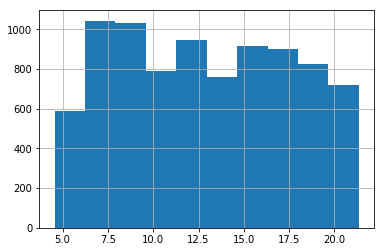

In [92]:
train['Item_Weight'].hist()

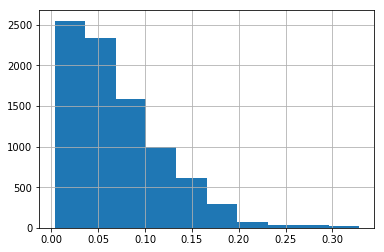

In [93]:
train['Item_Visibility'].hist()
#on the not expexcted : we see the most saled items which has visibility from 0.01 to 0.10 

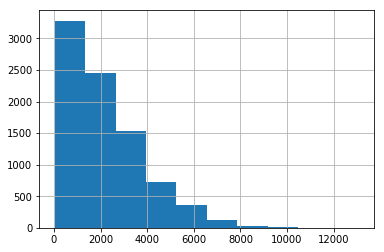

In [94]:
train['Item_Outlet_Sales'].hist()
# the most sales quqntites have values between (33 , 3000)

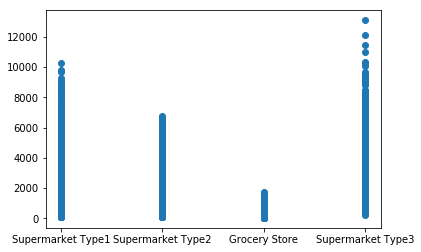

In [95]:
plt.scatter(train['Outlet_Type'], train['Item_Outlet_Sales'])

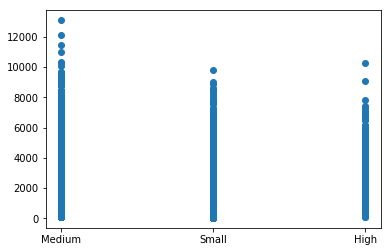

In [96]:
plt.scatter(train['Outlet_Size'], train['Item_Outlet_Sales'])
# the medium  has the most values in outlet sales may by bacause these has more values than others   

In [97]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  8523 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [98]:
train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [99]:
from sklearn.preprocessing import LabelEncoder
l1 = LabelEncoder()
train['Item_Fat_Content'] = l1.fit_transform(train['Item_Fat_Content'])
l2 = LabelEncoder()
train['Item_Type'] = l2.fit_transform(train['Item_Type'])
l3 = LabelEncoder()
train['Outlet_Identifier'] = l3.fit_transform(train['Outlet_Identifier'])
l4 = LabelEncoder()
train['Outlet_Size'] = l4.fit_transform(train['Outlet_Size'])
l5 = LabelEncoder()
train['Outlet_Location_Type'] = l5.fit_transform(train['Outlet_Location_Type'])
l6 = LabelEncoder()
train['Outlet_Type'] = l6.fit_transform(train['Outlet_Type'])
l7 = LabelEncoder()
train['Item_Identifier'] = l7.fit_transform(train['Item_Identifier'])


In [100]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.022911,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.016164,9,53.8614,1,1987,0,2,1,994.7052


In [101]:
import seaborn as sns

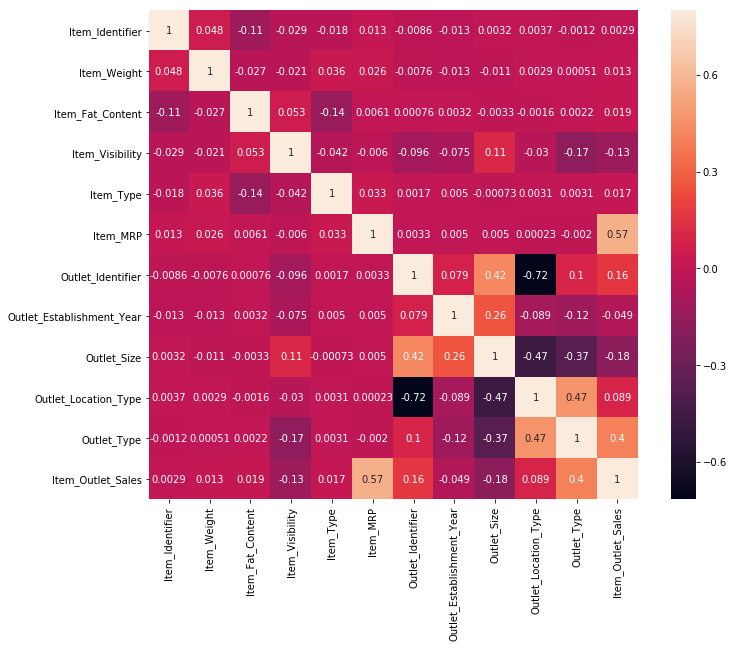

In [102]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, cbar=True, annot=True, square=True, vmax=.8);

### as we show above the most correlated columns on the dataset indecating the output are (item_MRP, outlet_type)


In [103]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
train.iloc[:,:-1] = sc.fit_transform(train.iloc[:,:-1])

In [104]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,-1.388514,-0.769756,-0.738147,-1.087303,-0.766479,1.747454,1.507813,0.139541,-0.517297,-1.369334,-0.252658,3735.1380
1,-1.717991,-1.497461,1.354743,-1.023083,1.608963,-1.489023,-0.607071,1.334103,-0.517297,1.091569,1.002972,443.4228
2,-0.262057,0.995683,-0.738147,-1.073136,0.658786,0.010040,1.507813,0.139541,-0.517297,-1.369334,-0.252658,2097.2700
3,0.759769,1.361688,1.354743,-0.950884,-0.291391,0.660050,-1.664513,0.020085,0.982337,1.091569,-1.508289,732.3800
4,1.151580,-0.849416,-0.738147,-1.084978,0.421242,-1.399220,-1.312032,-1.293934,-2.016931,1.091569,-0.252658,994.7052
